# Importing libraries

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=10,6

# Importing data and EDA

In [5]:
df=pd.read_csv('AirPassengers.csv')

In [6]:
df.index

RangeIndex(start=0, stop=144, step=1)

In [7]:
df.shape

(144, 2)

In [8]:
df.isna().sum()

Month          0
#Passengers    0
dtype: int64

In [9]:
type(df['Month'])

pandas.core.series.Series

In [10]:
from datetime import datetime

# Setting  month AS datetime

In [11]:
df['Month']=pd.to_datetime(df['Month'],infer_datetime_format=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [13]:
indexdataset=df.set_index('Month',inplace=False)

In [14]:
indexdataset.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [15]:
indexdataset.columns

Index(['#Passengers'], dtype='object')

In [16]:
import statsmodels.api as sm


# Seasonal decomposition in order to get overiew about the data

# 1.  Additive model

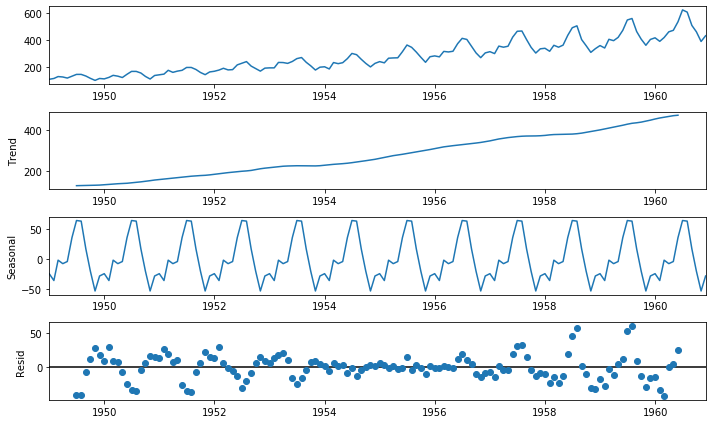

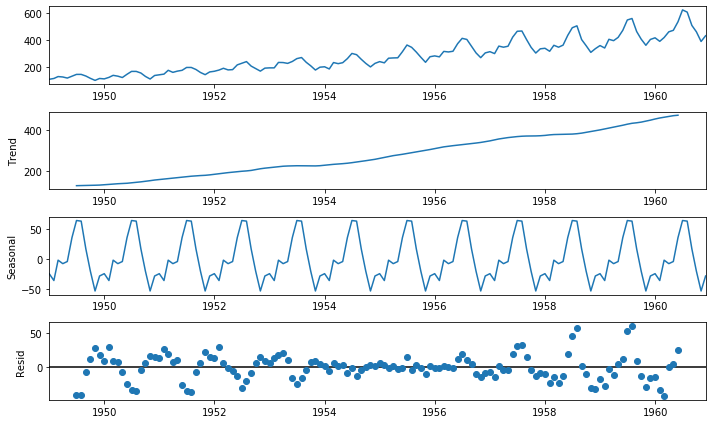

In [17]:
import statsmodels.api as sm
decomposition=sm.tsa.seasonal_decompose(indexdataset,model='additive')
decomposition.plot()

# 2. Multiplicative model

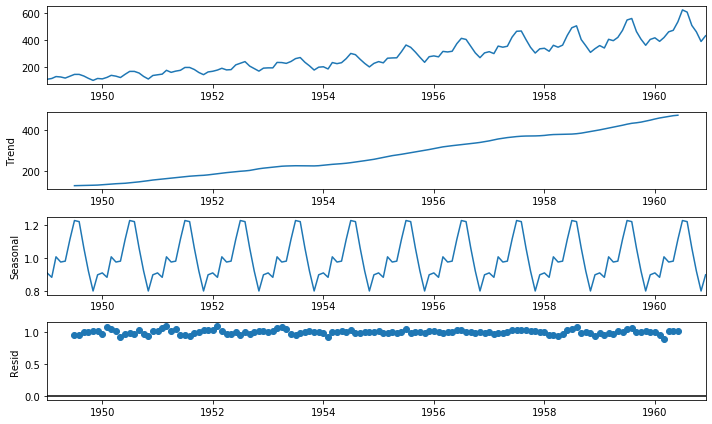

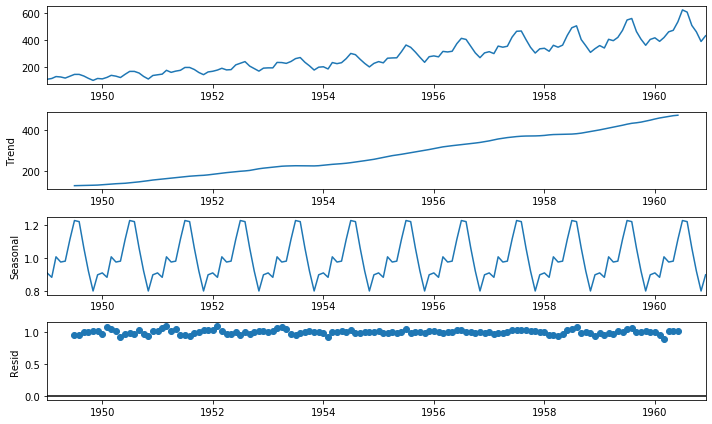

In [18]:
mul_decomposition=sm.tsa.seasonal_decompose(indexdataset,model='multiplicative')
mul_decomposition.plot()

# Another method to look over the original dataset

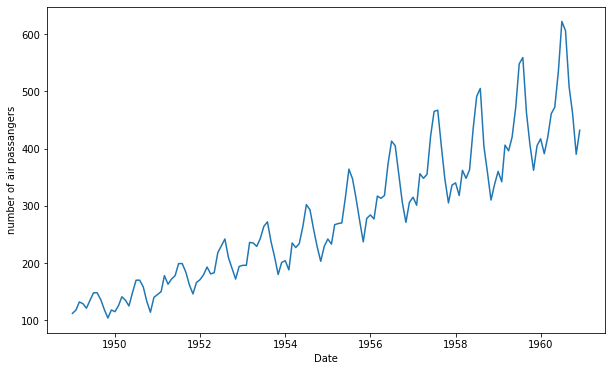

In [19]:
plt.xlabel('Date')
plt.ylabel('number of air passangers')
plt.plot(indexdataset)

#                    Time series component:---> 
#                  mean vs time? and std vs time?

In [20]:
rolmean=indexdataset.rolling(window=12).mean()

In [21]:
rolstd=indexdataset.rolling(window=12).std()

# how rooling mean and std varies wiith time ?

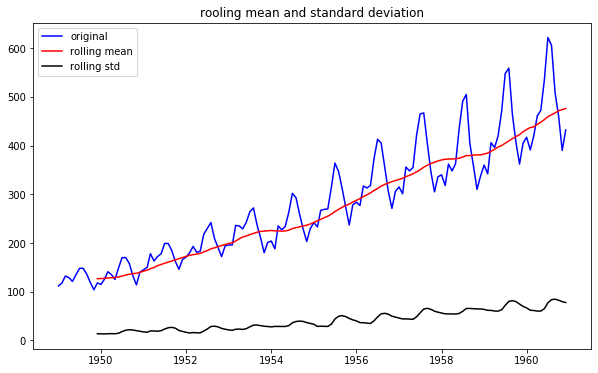

In [22]:
orig=plt.plot(indexdataset,color='blue',label='original')
mean=plt.plot(rolmean,color='red',label='rolling mean')
std=plt.plot(rolstd,color='black',label='rolling std')
plt.legend(loc='best')
plt.title('rooling mean and standard deviation')
plt.show(block=False)

# Implementing some statistical method for            stationarity of time series

In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
df_test=adfuller(indexdataset,autolag='AIC')
df_output=pd.Series(df_test[0:4],index=['test statistics','p-value','#lag used','number of observation used'])
for key,value in df_test[4].items():
    df_output['critical value (%s)'%key]=value
    
print(df_output)

test statistics                 0.815369
p-value                         0.991880
#lag used                      13.000000
number of observation used    130.000000
critical value (1%)            -3.481682
critical value (5%)            -2.884042
critical value (10%)           -2.578770
dtype: float64


Here the p-value is greater than 0.05, hence null hypothesis cant be rejected.


Null hypothesis for Augmented Dicky Fuller Test is: 
----------------------the given time series is non-stationary.

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Investigating non-stationarity of time series with  the help of ACF plots.

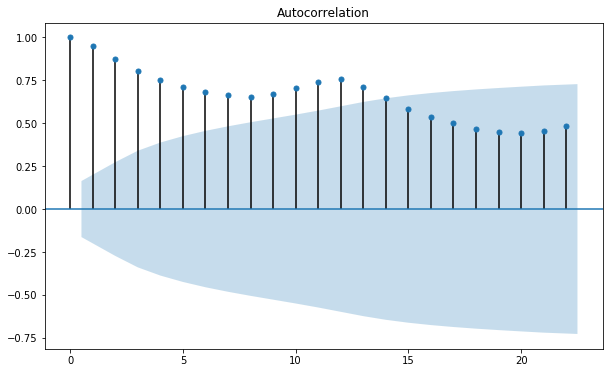

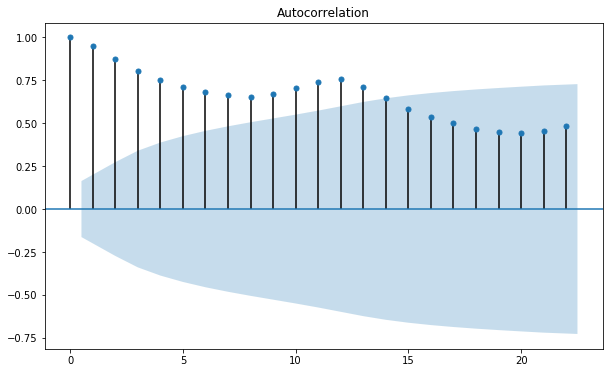

In [26]:
plot_acf(indexdataset)

The above ACF plots clearly indicate the non-stationarity in the timeseries.As there is a gradual decay of acf value and due to seasonality there is also a repetitive pattern present in the ACF plots.

Taking logarithm on data can help stabilise the variance in order to achieve stationarity.

# Condition for stationarity for time series
# 1. constant mean
# 2. constant variance
# 3. No correlation between the observations.

# original data after applying logaritmic transformation ?

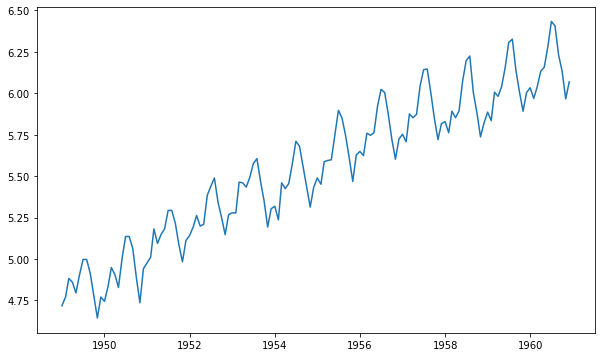

In [27]:
indexdataset_logscale=np.log(indexdataset)
plt.plot(indexdataset_logscale)

In [28]:
rolmean_log=indexdataset_logscale.rolling(window=12).mean()
rolstd_log=indexdataset_logscale.rolling(window=12).std()

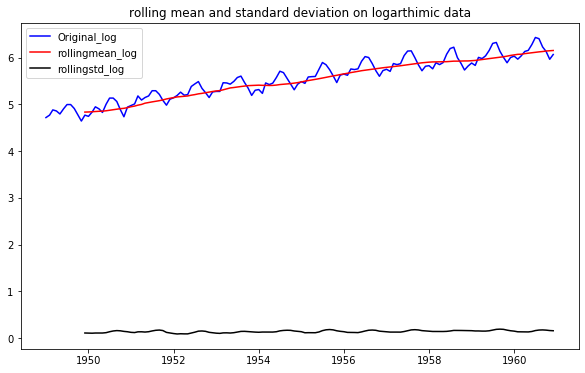

In [29]:
orig_log=plt.plot(indexdataset_logscale,color='blue',label='Original_log')
mean=plt.plot(rolmean_log,color='red',label='rollingmean_log')
std=plt.plot(rolstd_log,color='black',label='rollingstd_log')
plt.legend(loc='best')
plt.title('rolling mean and standard deviation on logarthimic data')
plt.show(block=False)

Here one can see the variance of the dataset is getting stablize. 
------>condition 2 (constant variance) of stationarity is achieved.
------> condition 1 (constant mean )of stationarity is not achieved and now we         are having linear trend. 

# Implementing Differencing in order to handle the trend.


differencing paramenter set to be d==1( default).

In [30]:
diff_indexdataset_logscale=indexdataset_logscale-indexdataset_logscale.shift()

In [31]:
diff_indexdataset_logscale.dropna(inplace=True)

In [32]:
diff_rolmean_log=diff_indexdataset_logscale.rolling(window=12).mean()
diff_rolstd_log=diff_indexdataset_logscale.rolling(window=12).std()

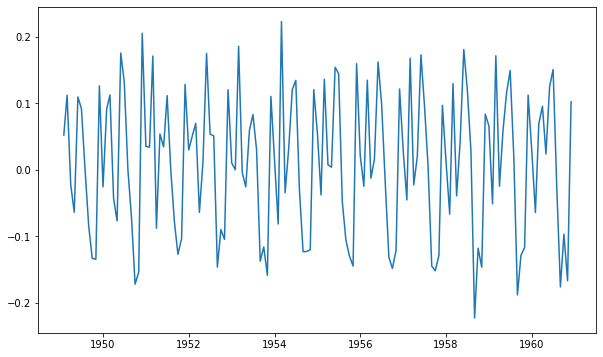

In [33]:
plt.plot(diff_indexdataset_logscale)

how mean and std_devaition varies over time?

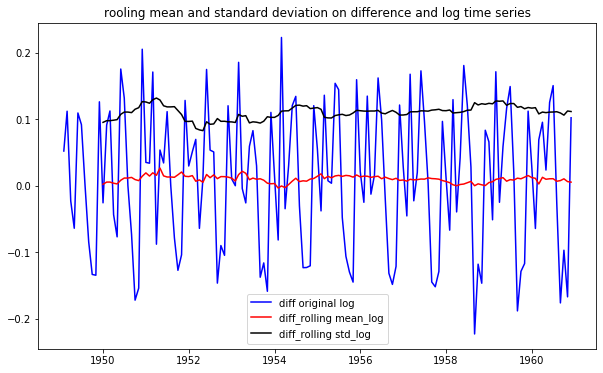

In [34]:
diff_orig_logscale=plt.plot(diff_indexdataset_logscale,color='blue',label='diff original log')
diff_mean_log=plt.plot(diff_rolmean_log,color='red',label='diff_rolling mean_log')
diff_std_log=plt.plot(diff_rolstd_log,color='black',label='diff_rolling std_log')
plt.legend(loc='best')
plt.title('rooling mean and standard deviation on difference and log time series')
plt.show(block=False)

We are approaching to have a constant mean after differencing the log dataset as compare to w/o differencing.

# Check whether stationarity is achieved on ---------< differenced log data >---or not?


In [35]:
diff_df_test_log=adfuller(diff_indexdataset_logscale,autolag='AIC')
df_output=pd.Series(diff_df_test_log[0:4],index=['test statistics','p-value','#lag used','number of observation used'])
for key,value in diff_df_test_log[4].items():
    df_output['critical value (%s)'%key]=value
    
print(df_output)

test statistics                -2.717131
p-value                         0.071121
#lag used                      14.000000
number of observation used    128.000000
critical value (1%)            -3.482501
critical value (5%)            -2.884398
critical value (10%)           -2.578960
dtype: float64


Here also p-value is greater than 0.05, hence null hypothesis can't be rejected.


Null hypothesis for Augmented Dicky Fuller Test is: 
----------------------the given time series is non-stationary.

We need to make some transformation in order to make time series stationarity.

# Check with another statistical method?

In [36]:
from statsmodels.tsa.stattools import kpss

In [37]:
kpss_test=kpss(diff_indexdataset_logscale['#Passengers'],'ct')
kpss_test

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.04895591448087797,
 0.1,
 14,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

# Non stationarity check using ACF graph.

In [38]:
from statsmodels.tsa.stattools import acf,pacf

In [39]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

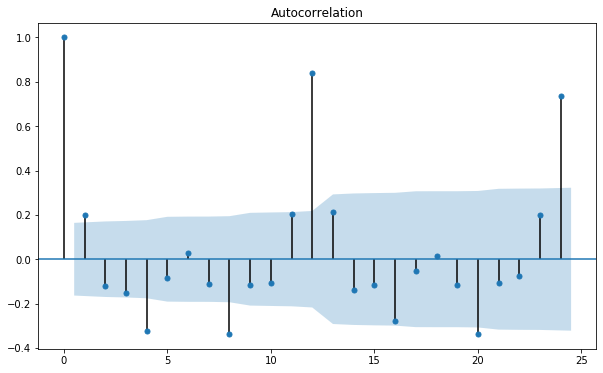

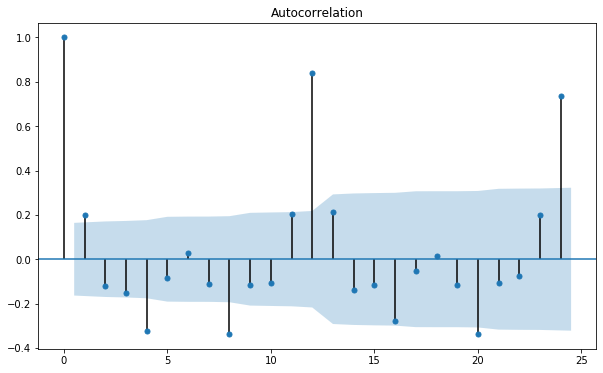

In [40]:
plot_acf(diff_indexdataset_logscale,lags=range(0,25))

There is a spike at lag in a particular interval and the spike height is getting decreased at lag=0, lag=12 and lag=24.
Hence there may is clear indication for annual seasonality. 

In [41]:
seasonal_diff_indexdataset_logscale=diff_indexdataset_logscale-diff_indexdataset_logscale.shift(12)

In [42]:
seasonal_diff_indexdataset_logscale.dropna(inplace=True)

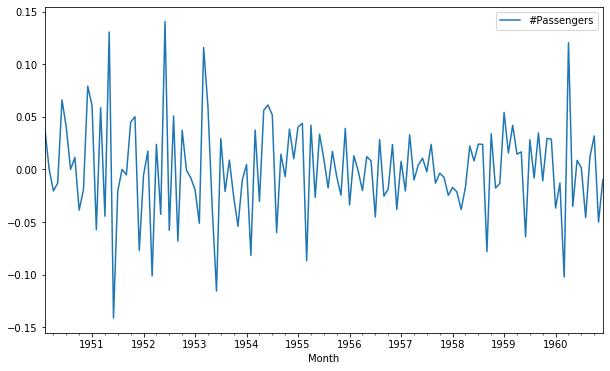

In [44]:
seasonal_diff_indexdataset_logscale.plot()

In [45]:
seasonal_diff_rolmean_log=seasonal_diff_indexdataset_logscale.rolling(window=12).mean()
seasonal_diff_rolstd_log=seasonal_diff_indexdataset_logscale.rolling(window=12).std()

In [46]:
seasonal_diff_df_test_log=adfuller(seasonal_diff_indexdataset_logscale,autolag='AIC')
df_output=pd.Series(seasonal_diff_df_test_log[0:4],index=['test statistics','p-value','#lag used','number of observation used'])
for key,value in seasonal_diff_df_test_log[4].items():
    df_output['critical value (%s)'%key]=value
    
print(df_output)

test statistics                -4.443325
p-value                         0.000249
#lag used                      12.000000
number of observation used    118.000000
critical value (1%)            -3.487022
critical value (5%)            -2.886363
critical value (10%)           -2.580009
dtype: float64


Here p-value is less than 0.05, hence null hypothesis can be rejected.


Null hypothesis for Augmented Dicky Fuller Test is: 
----------------------the given time series is non-stationary.

finally we achieve a stationary time series after seasonal difference ,normal difference and log operation.

In [47]:
kpss_test=kpss(seasonal_diff_indexdataset_logscale['#Passengers'],'ct')
kpss_test

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.05915524362710452,
 0.1,
 13,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

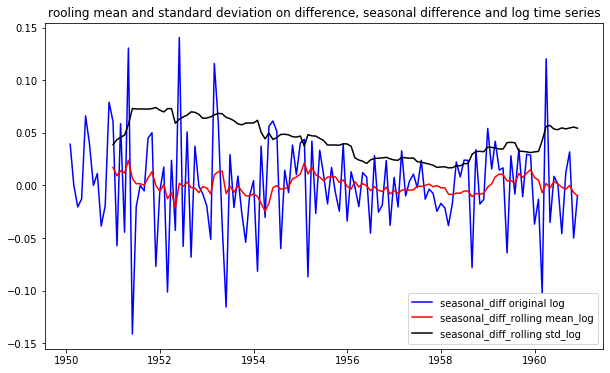

In [48]:
seasonal_diff_orig_log=plt.plot(seasonal_diff_indexdataset_logscale,color='blue',label='seasonal_diff original log')
seasonal_diff_mean_log=plt.plot(seasonal_diff_rolmean_log,color='red',label='seasonal_diff_rolling mean_log')
seasonal_diff_std_log=plt.plot(seasonal_diff_rolstd_log,color='black',label='seasonal_diff_rolling std_log')
plt.legend(loc='best')
plt.title('rooling mean and standard deviation on difference, seasonal difference and log time series')
plt.show(block=False)

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose

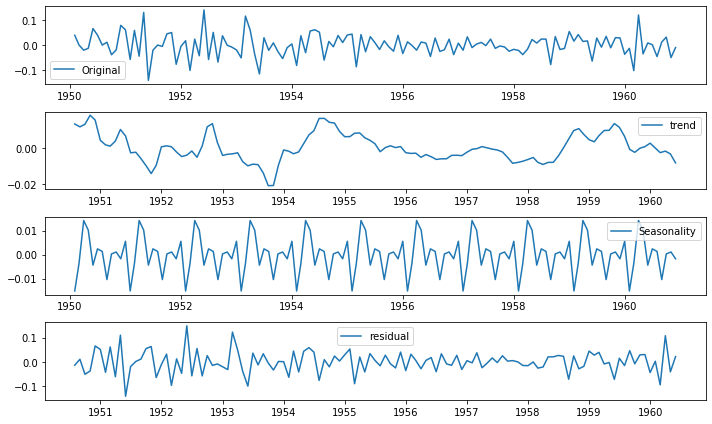

In [50]:
decomposition=seasonal_decompose(seasonal_diff_indexdataset_logscale)
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(seasonal_diff_indexdataset_logscale,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend(loc='best')
plt.tight_layout()


decomposedlogdata=residual
decomposedlogdata.dropna(inplace=True)


Now we have the stationary time series so we can proceed for SARIMA model.
 
For Sarima model we need to calculate p,d,q and P,D,Q for ARIMA and Seasonal components.

from above operations --->Order of differncing: d=1----------------------------------------------------------->Order of seasonal differecing: D=1--------------------------------------------------->We have to determine the p, q, P, Q?

# Determining the p and q using PACF and ACF plots respectively.

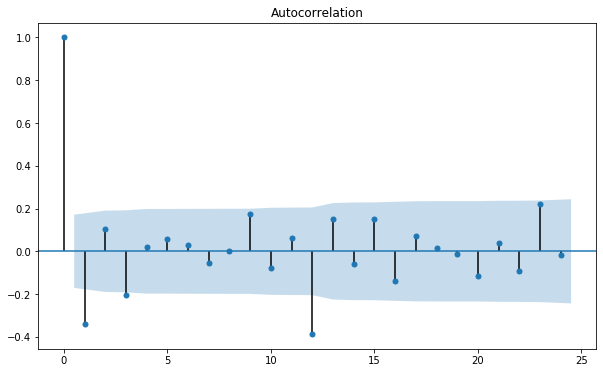

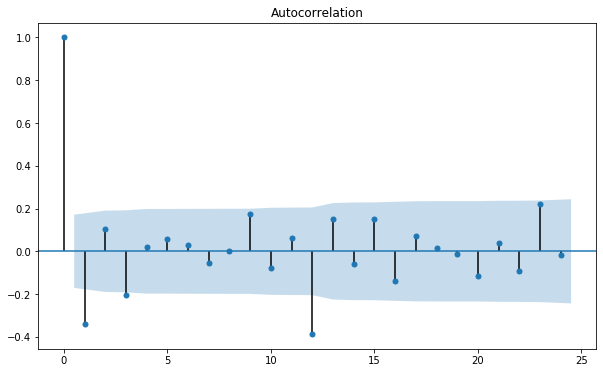

In [51]:
plot_acf(seasonal_diff_indexdataset_logscale,lags=range(0,25))

General rule of thumb to determine q is based on the acf plot. At lag 'k' if acf cutoff sharply then k is the appropriate choice for q.

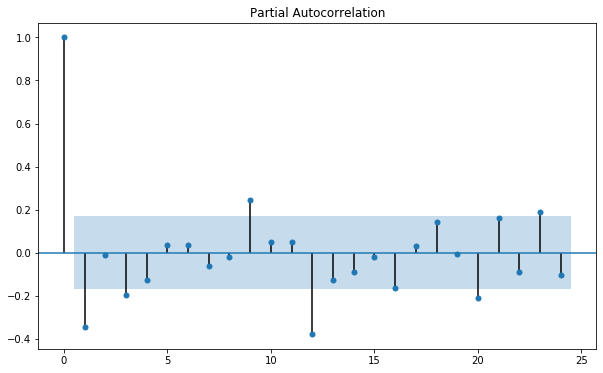

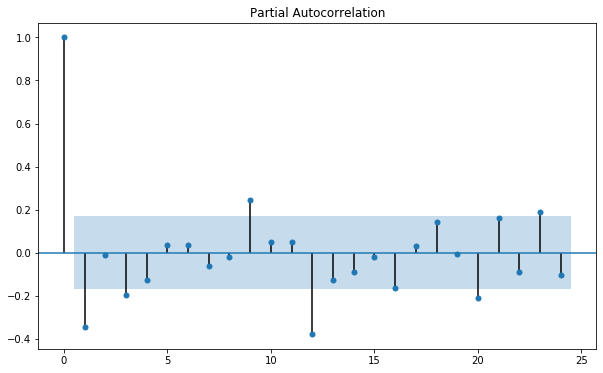

In [52]:
plot_pacf(seasonal_diff_indexdataset_logscale,lags=range(0,25))

General rule of thumb to determine p is based on the pacf plot. At lag 'k' if pacf cutoff sharply then k is the appropriate choice for p.

If the autocorrelation function (ACF) of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is negative--i.e., if the series appears slightly "overdifferenced"--then consider adding an MA term to the model. The lag beyond which the ACF cuts off is the indicated number of MA terms.

Now we are having parameters p=0,d=1,q=2 and P=0 ,D=1,Q=2, m=12.
m=the number of time steps for a single seasonal periods.
p=Trend autoregression order.
d=Trend difference order.
q=Trend moving average order
P=Seasonal autogressive order
D=Seasonal diffrence ordeer.
Q=Seasonal moving average order.

# Arima based time series forecasting model using the parameters. 

In [53]:
from statsmodels.tsa.statespace.api import SARIMAX
import itertools

Tune p,d,q and P, D, Q in Sarima model

In [54]:
p=range(0,3)
d=range(1,2)
q=range(0,4)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in pdq]
print('Example of parameters combinations for Seasonal ARIMA......')
print('SARIMAX:{} x {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX:{} x {}'.format(pdq[2],seasonal_pdq[2]))
print('SARIMAX:{} x {}'.format(pdq[3],seasonal_pdq[3]))
print('pdq:',pdq)
print()
print('seasonal_pdq:',seasonal_pdq)


Example of parameters combinations for Seasonal ARIMA......
SARIMAX:(0, 1, 1) x (0, 1, 1, 12)
SARIMAX:(0, 1, 2) x (0, 1, 2, 12)
SARIMAX:(0, 1, 3) x (0, 1, 3, 12)
pdq: [(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3)]

seasonal_pdq: [(0, 1, 0, 12), (0, 1, 1, 12), (0, 1, 2, 12), (0, 1, 3, 12), (1, 1, 0, 12), (1, 1, 1, 12), (1, 1, 2, 12), (1, 1, 3, 12), (2, 1, 0, 12), (2, 1, 1, 12), (2, 1, 2, 12), (2, 1, 3, 12)]


In [55]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model=SARIMAX(seasonal_diff_indexdataset_logscale, order=param, seasonal_order=param_seasonal)
            
            results=model.fit(method='powell')
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
            
        except:
            continue

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -0.592897
         Iterations: 2
         Function evaluations: 46
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:-153.3389309572809


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -0.909366
         Iterations: 4
         Function evaluations: 135
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:-234.25392330109042


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Optimization terminated successfully.
         Current function value: -0.994691
         Iterations: 2
         Function evaluations: 126
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:-254.60915009061227


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.006060
         Iterations: 9
         Function evaluations: 485
ARIMA(0, 1, 0)x(0, 1, 3, 12)12 - AIC:-255.58763359256608


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -0.793335
         Iterations: 2
         Function evaluations: 67
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:-203.85372340801578
Optimization terminated successfully.
         Current function value: -0.961916
         Iterations: 7
         Function evaluations: 324
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:-246.02206010382957


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.005162
         Iterations: 13
         Function evaluations: 946
ARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:-255.35239952630928


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.006411
         Iterations: 8
         Function evaluations: 541
ARIMA(0, 1, 0)x(1, 1, 3, 12)12 - AIC:-253.67977636251015


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -0.890738
         Iterations: 3
         Function evaluations: 145
ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:-227.3734443378196


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -0.984002
         Iterations: 4
         Function evaluations: 226
ARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:-249.80855587990987


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -0.981643
         Iterations: 4
         Function evaluations: 321
ARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:-247.19043597433932


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.007799
         Iterations: 18
         Function evaluations: 1436
ARIMA(0, 1, 0)x(2, 1, 3, 12)12 - AIC:-252.0432504118006


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.010832
         Iterations: 3
         Function evaluations: 131
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:-260.8378563497688


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.327168
         Iterations: 4
         Function evaluations: 217
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:-341.71809338737603


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.423708
         Iterations: 7
         Function evaluations: 470
ARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:-365.0114260465037


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.429324
         Iterations: 7
         Function evaluations: 522
ARIMA(0, 1, 1)x(0, 1, 3, 12)12 - AIC:-364.4827738377738


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.226440
         Iterations: 3
         Function evaluations: 147
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:-315.3271571227379


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.389597
         Iterations: 4
         Function evaluations: 261
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:-356.0744219410253


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.424950
         Iterations: 9
         Function evaluations: 668
ARIMA(0, 1, 1)x(1, 1, 2, 12)12 - AIC:-363.33688398823085


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.425130
         Iterations: 5
         Function evaluations: 444
ARIMA(0, 1, 1)x(1, 1, 3, 12)12 - AIC:-361.38410293204026


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.305703
         Iterations: 4
         Function evaluations: 267
ARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:-334.0942833342521


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.406048
         Iterations: 6
         Function evaluations: 458
ARIMA(0, 1, 1)x(2, 1, 1, 12)12 - AIC:-358.3846835396257


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.429092
         Iterations: 15
         Function evaluations: 1342
ARIMA(0, 1, 1)x(2, 1, 2, 12)12 - AIC:-362.4221649180434


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.429830
         Iterations: 12
         Function evaluations: 1225
ARIMA(0, 1, 1)x(2, 1, 3, 12)12 - AIC:-360.6154033177947
Optimization terminated successfully.
         Current function value: -1.056246
         Iterations: 2
         Function evaluations: 100
ARIMA(0, 1, 2)x(0, 1, 0, 12)12 - AIC:-270.7365169823388


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.385635
         Iterations: 4
         Function evaluations: 260
ARIMA(0, 1, 2)x(0, 1, 1, 12)12 - AIC:-355.0364966314442


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.508334
         Iterations: 7
         Function evaluations: 482
ARIMA(0, 1, 2)x(0, 1, 2, 12)12 - AIC:-385.1835654625545


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.509387
         Iterations: 7
         Function evaluations: 594
ARIMA(0, 1, 2)x(0, 1, 3, 12)12 - AIC:-383.45938813317355


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.297288
         Iterations: 3
         Function evaluations: 176
ARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:-331.8894946772036


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.467640
         Iterations: 5
         Function evaluations: 368
ARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:-374.52160828411195


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.506427
         Iterations: 11
         Function evaluations: 898
ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:-382.6838009805744


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.509023
         Iterations: 6
         Function evaluations: 574
ARIMA(0, 1, 2)x(1, 1, 3, 12)12 - AIC:-381.3640525867348


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.364322
         Iterations: 4
         Function evaluations: 323
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:-347.4524089908846


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.480923
         Iterations: 6
         Function evaluations: 508
ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:-376.00183863005105


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.507185
         Iterations: 13
         Function evaluations: 1227
ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:-380.8823530045603


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.511604
         Iterations: 11
         Function evaluations: 1228
ARIMA(0, 1, 2)x(2, 1, 3, 12)12 - AIC:-380.0403325663936


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: -1.056816
         Iterations: 2
         Function evaluations: 182
ARIMA(0, 1, 3)x(0, 1, 0, 12)12 - AIC:-268.8858185216282


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.385446
         Iterations: 5
         Function evaluations: 406
ARIMA(0, 1, 3)x(0, 1, 1, 12)12 - AIC:-352.98693601868206


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.508150
         Iterations: 6
         Function evaluations: 551
ARIMA(0, 1, 3)x(0, 1, 2, 12)12 - AIC:-383.13542231443233


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.509282
         Iterations: 6
         Function evaluations: 603
ARIMA(0, 1, 3)x(0, 1, 3, 12)12 - AIC:-381.43180449570553


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.295964
         Iterations: 3
         Function evaluations: 203
ARIMA(0, 1, 3)x(1, 1, 0, 12)12 - AIC:-329.54254375450523


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.467533
         Iterations: 7
         Function evaluations: 594
ARIMA(0, 1, 3)x(1, 1, 1, 12)12 - AIC:-372.49355602164763


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.507310
         Iterations: 10
         Function evaluations: 981
ARIMA(0, 1, 3)x(1, 1, 2, 12)12 - AIC:-380.9151538838242


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.509073
         Iterations: 6
         Function evaluations: 668
ARIMA(0, 1, 3)x(1, 1, 3, 12)12 - AIC:-379.37702463932067


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.364322
         Iterations: 4
         Function evaluations: 345
ARIMA(0, 1, 3)x(2, 1, 0, 12)12 - AIC:-345.45245724342504


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.480685
         Iterations: 9
         Function evaluations: 901
ARIMA(0, 1, 3)x(2, 1, 1, 12)12 - AIC:-373.939455632373


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.506971
         Iterations: 14
         Function evaluations: 1485
ARIMA(0, 1, 3)x(2, 1, 2, 12)12 - AIC:-378.8263351356372


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.511504
         Iterations: 10
         Function evaluations: 1185
ARIMA(0, 1, 3)x(2, 1, 3, 12)12 - AIC:-378.0140375343052
Optimization terminated successfully.
         Current function value: -0.869473
         Iterations: 1
         Function evaluations: 30
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:-223.8018659299565


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.177686
         Iterations: 5
         Function evaluations: 225
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:-302.5538000773354


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.259176
         Iterations: 6
         Function evaluations: 329
ARIMA(1, 1, 0)x(0, 1, 2, 12)12 - AIC:-321.9042020930465


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.267359
         Iterations: 6
         Function evaluations: 415
ARIMA(1, 1, 0)x(0, 1, 3, 12)12 - AIC:-322.0479995152686


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.073924
         Iterations: 3
         Function evaluations: 160
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:-275.36805020958326


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.230440
         Iterations: 6
         Function evaluations: 342
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:-314.37520248258596


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.264386
         Iterations: 11
         Function evaluations: 732
ARIMA(1, 1, 0)x(1, 1, 2, 12)12 - AIC:-321.2692016034533


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.261645
         Iterations: 5
         Function evaluations: 424
ARIMA(1, 1, 0)x(1, 1, 3, 12)12 - AIC:-318.5510618256752


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.138123
         Iterations: 3
         Function evaluations: 168
ARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:-290.18824143402566


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.239291
         Iterations: 7
         Function evaluations: 475
ARIMA(1, 1, 0)x(2, 1, 1, 12)12 - AIC:-314.6941441415416


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.233896
         Iterations: 5
         Function evaluations: 406
ARIMA(1, 1, 0)x(2, 1, 2, 12)12 - AIC:-311.2808377993494


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.268474
         Iterations: 15
         Function evaluations: 1487
ARIMA(1, 1, 0)x(2, 1, 3, 12)12 - AIC:-318.3402675020553


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.058955
         Iterations: 4
         Function evaluations: 186
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:-271.44609047297416


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.383546
         Iterations: 4
         Function evaluations: 278
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:-354.4890976832976


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.497965
         Iterations: 6
         Function evaluations: 427
ARIMA(1, 1, 1)x(0, 1, 2, 12)12 - AIC:-382.4668201223782


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.498798
         Iterations: 5
         Function evaluations: 437
ARIMA(1, 1, 1)x(0, 1, 3, 12)12 - AIC:-380.6849792210765


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.293225
         Iterations: 3
         Function evaluations: 183
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:-330.82486123892795


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.460643
         Iterations: 5
         Function evaluations: 367
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-372.6884636353395


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.497500
         Iterations: 13
         Function evaluations: 1049
ARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:-380.3449849545971


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.497799
         Iterations: 6
         Function evaluations: 562
ARIMA(1, 1, 1)x(1, 1, 3, 12)12 - AIC:-378.423264960978


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.360761
         Iterations: 4
         Function evaluations: 308
ARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:-346.5194118019501


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.472747
         Iterations: 6
         Function evaluations: 510
ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:-373.85976482714216


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.500004
         Iterations: 19
         Function evaluations: 1897
ARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:-379.00098595067726


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.502259
         Iterations: 12
         Function evaluations: 1344
ARIMA(1, 1, 1)x(2, 1, 3, 12)12 - AIC:-377.5919312614562


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.065884
         Iterations: 3
         Function evaluations: 191
ARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:-271.26168661038326


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.383593
         Iterations: 7
         Function evaluations: 525
ARIMA(1, 1, 2)x(0, 1, 1, 12)12 - AIC:-352.5014932799792


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.508476
         Iterations: 11
         Function evaluations: 970
ARIMA(1, 1, 2)x(0, 1, 2, 12)12 - AIC:-383.2207622744345


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.509535
         Iterations: 9
         Function evaluations: 872
ARIMA(1, 1, 2)x(0, 1, 3, 12)12 - AIC:-381.4982034178214


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.297320
         Iterations: 8
         Function evaluations: 607
ARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:-329.8978329169332


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.467277
         Iterations: 8
         Function evaluations: 680
ARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:-372.4266334720913


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.507095
         Iterations: 11
         Function evaluations: 1078
ARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:-380.8588747199707


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.509802
         Iterations: 8
         Function evaluations: 888
ARIMA(1, 1, 2)x(1, 1, 3, 12)12 - AIC:-379.5679956176151


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.364320
         Iterations: 7
         Function evaluations: 669
ARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:-345.45189886850744


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.480971
         Iterations: 8
         Function evaluations: 788
ARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:-374.0142725809294


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.468835
         Iterations: 9
         Function evaluations: 1024
ARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:-368.8346739821797


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.513109
         Iterations: 12
         Function evaluations: 1459
ARIMA(1, 1, 2)x(2, 1, 3, 12)12 - AIC:-378.43454671522164


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.067104
         Iterations: 3
         Function evaluations: 243
ARIMA(1, 1, 3)x(0, 1, 0, 12)12 - AIC:-269.58121588562017


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.389084
         Iterations: 5
         Function evaluations: 439
ARIMA(1, 1, 3)x(0, 1, 1, 12)12 - AIC:-351.94009342558996


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.508287
         Iterations: 6
         Function evaluations: 609
ARIMA(1, 1, 3)x(0, 1, 2, 12)12 - AIC:-381.17120384217725


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.509456
         Iterations: 6
         Function evaluations: 673
ARIMA(1, 1, 3)x(0, 1, 3, 12)12 - AIC:-379.47737039950346


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.301501
         Iterations: 3
         Function evaluations: 253
ARIMA(1, 1, 3)x(1, 1, 0, 12)12 - AIC:-328.9933476468778


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.468623
         Iterations: 7
         Function evaluations: 717
ARIMA(1, 1, 3)x(1, 1, 1, 12)12 - AIC:-370.77913864636037


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.507607
         Iterations: 10
         Function evaluations: 1121
ARIMA(1, 1, 3)x(1, 1, 2, 12)12 - AIC:-378.9929785263911


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.509162
         Iterations: 6
         Function evaluations: 731
ARIMA(1, 1, 3)x(1, 1, 3, 12)12 - AIC:-377.4003895596958


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.365667
         Iterations: 3
         Function evaluations: 307
ARIMA(1, 1, 3)x(2, 1, 0, 12)12 - AIC:-343.80469284929245


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.481069
         Iterations: 10
         Function evaluations: 1069
ARIMA(1, 1, 3)x(2, 1, 1, 12)12 - AIC:-372.04004145562965


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.507448
         Iterations: 15
         Function evaluations: 1787
ARIMA(1, 1, 3)x(2, 1, 2, 12)12 - AIC:-376.951346439019


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.507161
         Iterations: 10
         Function evaluations: 1360
ARIMA(1, 1, 3)x(2, 1, 3, 12)12 - AIC:-374.87609707108106
Optimization terminated successfully.
         Current function value: -0.890774
         Iterations: 1
         Function evaluations: 47
ARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:-227.38288947271795


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.216087
         Iterations: 5
         Function evaluations: 292
ARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:-310.6147282154645


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.339532
         Iterations: 6
         Function evaluations: 430
ARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:-340.95726727868407


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.340704
         Iterations: 7
         Function evaluations: 577
ARIMA(2, 1, 0)x(0, 1, 3, 12)12 - AIC:-339.26449387586456


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.112693
         Iterations: 3
         Function evaluations: 189
ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:-283.52568130775455


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.293257
         Iterations: 8
         Function evaluations: 585
ARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:-328.8332633498698


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.339297
         Iterations: 11
         Function evaluations: 1094
ARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:-338.8957993921406


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.339869
         Iterations: 7
         Function evaluations: 682
ARIMA(2, 1, 0)x(1, 1, 3, 12)12 - AIC:-337.0456983328376


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.192672
         Iterations: 4
         Function evaluations: 289
ARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:-302.480109702338


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.313771
         Iterations: 10
         Function evaluations: 829
ARIMA(2, 1, 0)x(2, 1, 1, 12)12 - AIC:-332.2080059557203


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.338851
         Iterations: 15
         Function evaluations: 1406
ARIMA(2, 1, 0)x(2, 1, 2, 12)12 - AIC:-336.7788511137705


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.340430
         Iterations: 12
         Function evaluations: 1298
ARIMA(2, 1, 0)x(2, 1, 3, 12)12 - AIC:-335.19276508445495


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Optimization terminated successfully.
         Current function value: -1.060481
         Iterations: 4
         Function evaluations: 280
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:-269.84610018448797


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.383507
         Iterations: 4
         Function evaluations: 296
ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:-352.47884604913287


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.502116
         Iterations: 6
         Function evaluations: 510
ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:-381.5542967330686


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.503617
         Iterations: 7
         Function evaluations: 702
ARIMA(2, 1, 1)x(0, 1, 3, 12)12 - AIC:-379.9475625378572


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.293421
         Iterations: 4
         Function evaluations: 286
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:-328.8763942460703


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.462515
         Iterations: 5
         Function evaluations: 437
ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:-371.1788838779963


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.501332
         Iterations: 13
         Function evaluations: 1194
ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:-379.3490413721941


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.502600
         Iterations: 6
         Function evaluations: 638
ARIMA(2, 1, 1)x(1, 1, 3, 12)12 - AIC:-377.68110887034726


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.361609
         Iterations: 4
         Function evaluations: 350
ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:-344.7416826328743


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.476421
         Iterations: 6
         Function evaluations: 603
ARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:-372.822218246089


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.501915
         Iterations: 18
         Function evaluations: 1850
ARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:-377.5017423944971


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.506826
         Iterations: 12
         Function evaluations: 1458
ARIMA(2, 1, 1)x(2, 1, 3, 12)12 - AIC:-376.7883290323631


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.066448
         Iterations: 3
         Function evaluations: 244
ARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:-269.40943180295545


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.384759
         Iterations: 4
         Function evaluations: 359
ARIMA(2, 1, 2)x(0, 1, 1, 12)12 - AIC:-350.80689443001415


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.500988
         Iterations: 7
         Function evaluations: 678
ARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:-379.25873251549956


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.501063
         Iterations: 5
         Function evaluations: 572
ARIMA(2, 1, 2)x(0, 1, 3, 12)12 - AIC:-377.2785558896887


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.294182
         Iterations: 3
         Function evaluations: 246
ARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:-327.0758065583719


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.461286
         Iterations: 5
         Function evaluations: 488
ARIMA(2, 1, 2)x(1, 1, 1, 12)12 - AIC:-368.8568599141619


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.500233
         Iterations: 10
         Function evaluations: 1095
ARIMA(2, 1, 2)x(1, 1, 2, 12)12 - AIC:-377.0609851636246


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.501149
         Iterations: 6
         Function evaluations: 723
ARIMA(2, 1, 2)x(1, 1, 3, 12)12 - AIC:-375.3010959968894


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.360775
         Iterations: 4
         Function evaluations: 413
ARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:-342.523037874307


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.475120
         Iterations: 6
         Function evaluations: 655
ARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:-370.48148159802935


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.470516
         Iterations: 11
         Function evaluations: 1368
ARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:-367.2752765534049


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.502391
         Iterations: 12
         Function evaluations: 1624
ARIMA(2, 1, 2)x(2, 1, 3, 12)12 - AIC:-373.6265394759527


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.066583
         Iterations: 5
         Function evaluations: 452
ARIMA(2, 1, 3)x(0, 1, 0, 12)12 - AIC:-267.44472074606915


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.390621
         Iterations: 7
         Function evaluations: 671
ARIMA(2, 1, 3)x(0, 1, 1, 12)12 - AIC:-350.3425802824572


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.508652
         Iterations: 8
         Function evaluations: 896
ARIMA(2, 1, 3)x(0, 1, 2, 12)12 - AIC:-379.26686513671655


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.509780
         Iterations: 9
         Function evaluations: 1112
ARIMA(2, 1, 3)x(0, 1, 3, 12)12 - AIC:-377.5622739313453


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.307566
         Iterations: 8
         Function evaluations: 842
ARIMA(2, 1, 3)x(1, 1, 0, 12)12 - AIC:-328.5823170620875


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.471333
         Iterations: 10
         Function evaluations: 1104
ARIMA(2, 1, 3)x(1, 1, 1, 12)12 - AIC:-369.4892579450992


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.507137
         Iterations: 9
         Function evaluations: 1126
ARIMA(2, 1, 3)x(1, 1, 2, 12)12 - AIC:-376.8698734575355


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.509698
         Iterations: 7
         Function evaluations: 926
ARIMA(2, 1, 3)x(1, 1, 3, 12)12 - AIC:-375.5408316665769


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.364980
         Iterations: 7
         Function evaluations: 757
ARIMA(2, 1, 3)x(2, 1, 0, 12)12 - AIC:-341.6246926496286


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.479644
         Iterations: 7
         Function evaluations: 856
ARIMA(2, 1, 3)x(2, 1, 1, 12)12 - AIC:-369.66679009181985


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.511809
         Iterations: 15
         Function evaluations: 2032
ARIMA(2, 1, 3)x(2, 1, 2, 12)12 - AIC:-376.0939129938263


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: -1.513191
         Iterations: 12
         Function evaluations: 1784
ARIMA(2, 1, 3)x(2, 1, 3, 12)12 - AIC:-374.4560406467949


-----

The best AIC value obtained is -385.1835645 for model ARIMA(0, 1, 2)X(0, 1, 2, 12)

-----

# Creating a ARIMA(0,1,2)x(0,1,2,12) 

-

In [56]:
model=SARIMAX(seasonal_diff_indexdataset_logscale,order=(0,1,2),seasonal_order=(0,1,2,12))

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


# Fiting the model

In [57]:
result=model.fit(disp=-1)

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


# How well the data is fitted?

plotting AR model


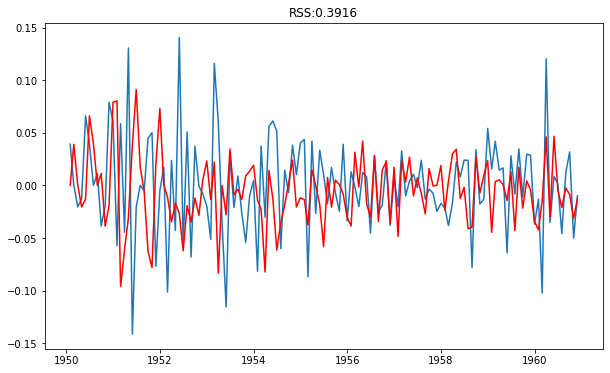

In [59]:
plt.plot(seasonal_diff_indexdataset_logscale)
plt.plot(result.fittedvalues,color='red')
plt.title('RSS:%.4f'%sum((result.fittedvalues-seasonal_diff_indexdataset_logscale['#Passengers'])**2))
print('plotting AR model')

We obtained the Residual Sum Squared value very close to zero. hence the above time series forecasting model is good in terms on fitting the time seres.

The result:------>>>>

In [65]:
print(result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        #Passengers   No. Observations:                  131
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 12)   Log Likelihood                 197.428
Date:                            Wed, 13 Jan 2021   AIC                           -384.856
Time:                                    13:05:23   BIC                           -371.002
Sample:                                02-01-1950   HQIC                          -379.231
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.4395      0.148     -9.703      0.000      -1.730      -1.149
ma.L2          0.4513      0.085   

==============================================================================

# Residual Diagnostics?


The Residual dignostics will tell u about whether ther is a room of improvement in the model present or not.

White Noise condition:--

1. The residuals have zero mean and constant varinace.
2. The residual should normally distributed.
3. The residual should not be correlated. 

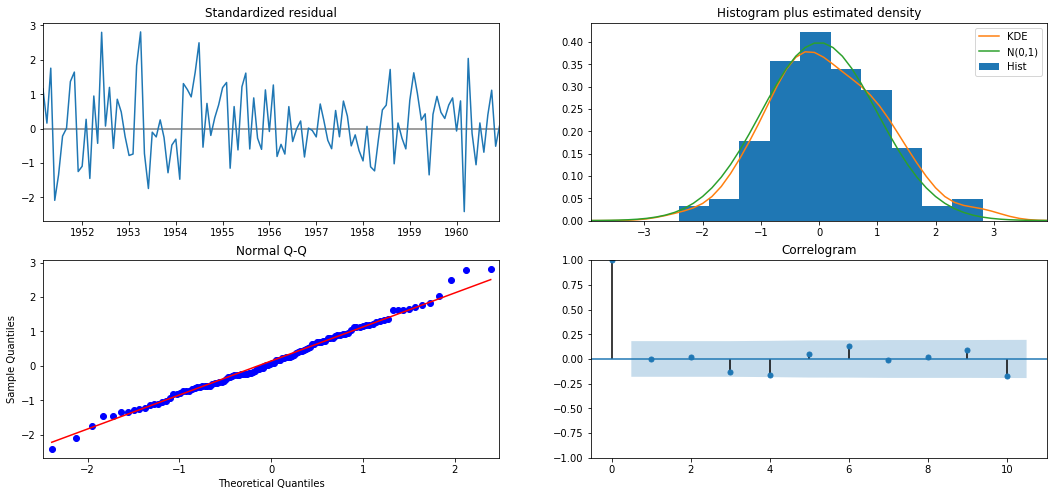

In [67]:
result.plot_diagnostics(figsize=(18,8))
plt.show()

condition 3 statistical method:


Another statistical method to check white noise condition:

Ljung box test:::
----------> Null Hypothesis:Their is no autocorrelation b/w the signal and its lagged value.

The test statistics Q is :
https://wikimedia.org/api/rest_v1/media/math/render/svg/bb68b5d73ab4813712778e246303961ae48d6190


In [71]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [76]:
acorr_ljungbox(result.resid, lags=[10],return_df=True)

,lb_stat,lb_pvalue
10,14.889843,0.13613


forecasting for one step ahead:
:Predictions

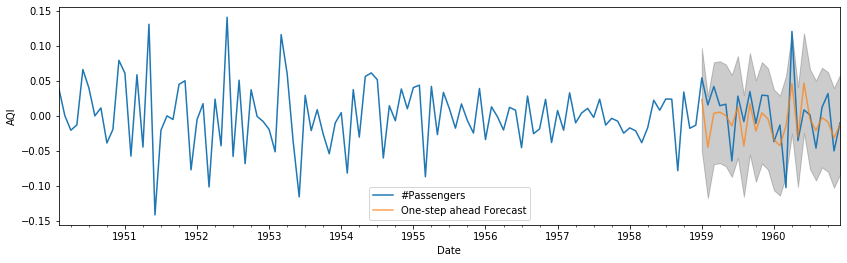

In [78]:
pred = result.get_prediction(start=pd.to_datetime('1959-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = seasonal_diff_indexdataset_logscale.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('AQI')
plt.legend()
plt.show()

# Transforming the data into its original form

In [81]:
predictions=pd.Series(result.fittedvalues,copy=True)

In [84]:
predictions_diff_cumsum=predictions.cumsum()

In [85]:
predictions_diff_log=pd.Series(indexdataset_logscale['#Passengers'].iloc[0],index=indexdataset_logscale.index)
predictions_diff_log=predictions_diff_log.add(predictions_diff_cumsum, fill_value=0)


In [86]:
predictions_sarima=np.exp(predictions_diff_log)

In [88]:
#plt.plot(indexdataset)
#plt.plot(predictions_sarima)